In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

## Introducción

Un problema común en matemáticas es el de determinar los valores de 
$x$ tales que 

$$f(x)=0$$ donde $f$ es una función. A los $x$ que satisfacen la igualdad, 
se les dice ```raíces``` o ```ceros``` de la ecuación.

**Ej**: $\sin x - x = 0$ con solución única.

**Ej**: $\tan x - x = 0$ con infinitas soluciones.

### Método de búsqueda incremental

Generalmente los métodos para resolver ecuaciones de manera iterativa,
deben dar inicio con un valor y dicho valor en algunas ocasiones se puede
intuir desde el gráfico de la función involucrada en la ecuación.

La idea básica del método de búsqueda incremental es verificar que 
$f(x _{ 1} )$ y $f(x _{ 2} )$ tengan signos opuestos (asumiendo que $f$ tiene continuidad) y 
concluir que hay al menos una raíz en el intervalo $(x _{ 1} , x _{ 2} )$. Con dicho método hay un 
problema y es que las raíces dobles no se identifican. (Ej: $x ^{ 2} =0$).

In [2]:
import numpy as np

def rootsearch(f, a, b, dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while np.sign(f1) == np.sign(f2):
        if x1 >= b:
            return None, None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    return x1, x2

Una raíz de $x ^{ 3}-10x ^{ 2} + 5=0 $ vive en el intervalo $(0,1)$. Use ```rootsearch()```
para calcular dicha raíz con cuatro dígitos de aproximación.


.

.

In [3]:
def f(x):
    return x ** 3 - 10.0 * x ** 2 + 5.0

x1, x2 = 0.0, 1.0
for i in range(4):
    dx = (x2 - x1) / 10.0
    x1, x2 = rootsearch(f, x1, x2, dx)
x = (x1 + x2) / 2.0
print('x = %.4f'%(x))

x = 0.7346


## El método de la bisección

El método de la bisección usa el mismo pricipio que el de búsqueda incremental.

En este caso toma $x _{3}=\frac{1}{2}(x_1 + x_2)$ (punto medio del intervalo $(x_1, x_2)$).

Si $f(x _2)$ y $f(x_3)$ tienen signos opuestos, entonces la raíz tiene que estar en $(x_2, x_3)$. En cuyo caso reeplaza $x_1$ por $x_3$. En otro caso, la raíz estará en $(x_1, x_3)$ y se reemplazará $x_2$ por $x_3$.

En cualquiera de los casos, el nuevo intervalo tiene la mitad de la longitud del intervalo original.

#### Cantidad de iteraciones en el método de la bisección

El método de la bisección se repite hasta que el intervalo ha sido reducido a tener una longitud mejor igual a un valor pequeño $\varepsilon$ $$|x_2-x_1|< \varepsilon$$

Para calcular el número de bisecciones a realizar, note que si el intervalo original tiene longitud $\Delta x$, después de una iteración su longitud se reduce a $\Delta x /2$. Después de $2$ iteraciones a $\Delta x / 2^2$. Después de $3$ iteraciones a $\Delta x / 2^3$ y en general, después de $k$ iteraciones a $\Delta x / 2^k$.

Es así como se deben tomar tantas iteraciones como el cielo de $$\displaystyle \frac{\ln (\Delta x /\varepsilon)}{\ln 2}$$

In [4]:
import numpy as np

def bisection(f, x1, x2, switch=1, tol=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0:
        return x1
    f2 = f(x2)
    if f2 == 0.0:
        return x2
    if np.sign(f1) == np.sign(f2):
        print("Raíz no localizada")
    n = int(np.ceil(np.log(abs(x2 - x1) / tol) / np.log(2)))

    for i in range(n):
        x3 = 0.5 * (x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0:
            return x3
        if np.sign(f2) != np.sign(f3):
            x1 = x3; f1 = f3
        else:
            x2 = x3; f2 = f3
    return (x1 + x2) / 2.0

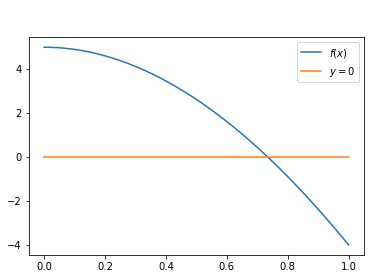

In [5]:
xs1 = np.linspace(0, 1)
ys1 = xs1**3 - 10.0*xs1**2 + 5.0
plt.plot(xs1, ys1)
plt.plot([0, 1], [0, 0])
plt.title(f'$f(x)=x^3-10x^2+5$', color='white', fontsize=25)
plt.legend([r'$f(x)$', r'$y=0$'])
plt.show()

In [6]:
############## Ejemplo1 ##############
def f(x): return x**3 - 10.0*x**2 + 5.0

x = bisection(f, 0.0, 1.0, tol=1.0e-4)
print('x = {:.4f}'.format(x))

x = 0.7346


In [7]:
from ipywidgets import interact

def graf_x_menos_tan_x(N=50):
    xs2 = np.linspace(0, 20, N)
    ys2 = xs2 - np.tan(xs2)
    plt.plot(xs2, ys2)
    plt.plot([0, 20], [0, 0])
    plt.title(f'$f(x)=x-tan(x)$', color='white', fontsize=25)
    plt.legend([r'$f(x)$', r'$y=0$'])
    plt.show()

interact(graf_x_menos_tan_x, N=(50, 400, 50))
plt.show()

interactive(children=(IntSlider(value=50, description='N', max=400, min=50, step=50), Output()), _dom_classes=…

In [8]:
############## Ejemplo2 ##############

def f(x): return x - np.tan(x)

a, b, dx = (0.0, 20.0, 0.01)

print("Las raíces son: ")
while True:
    x1, x2 = rootsearch(f, a, b, dx)
    if x1 != None:
        a = x2
        root = bisection(f, x1, x2, 1)
        if root != None: print(root)
    else:
        print("\nDone")
        break

Las raíces son: 
0.0
4.493409458100745
7.725251837074637
10.904121659695917
14.06619391292308
17.220755272209537

Done


## Regula Falsi

El método regula falsi requiere dos estimaciones iniciales de la raíz, digamos, $x _{ 1} $ y $x _{ 2} $ que localicen la raíz.
La función $f(x)$ se asume aproximadamente lineal cerca de la raíz.

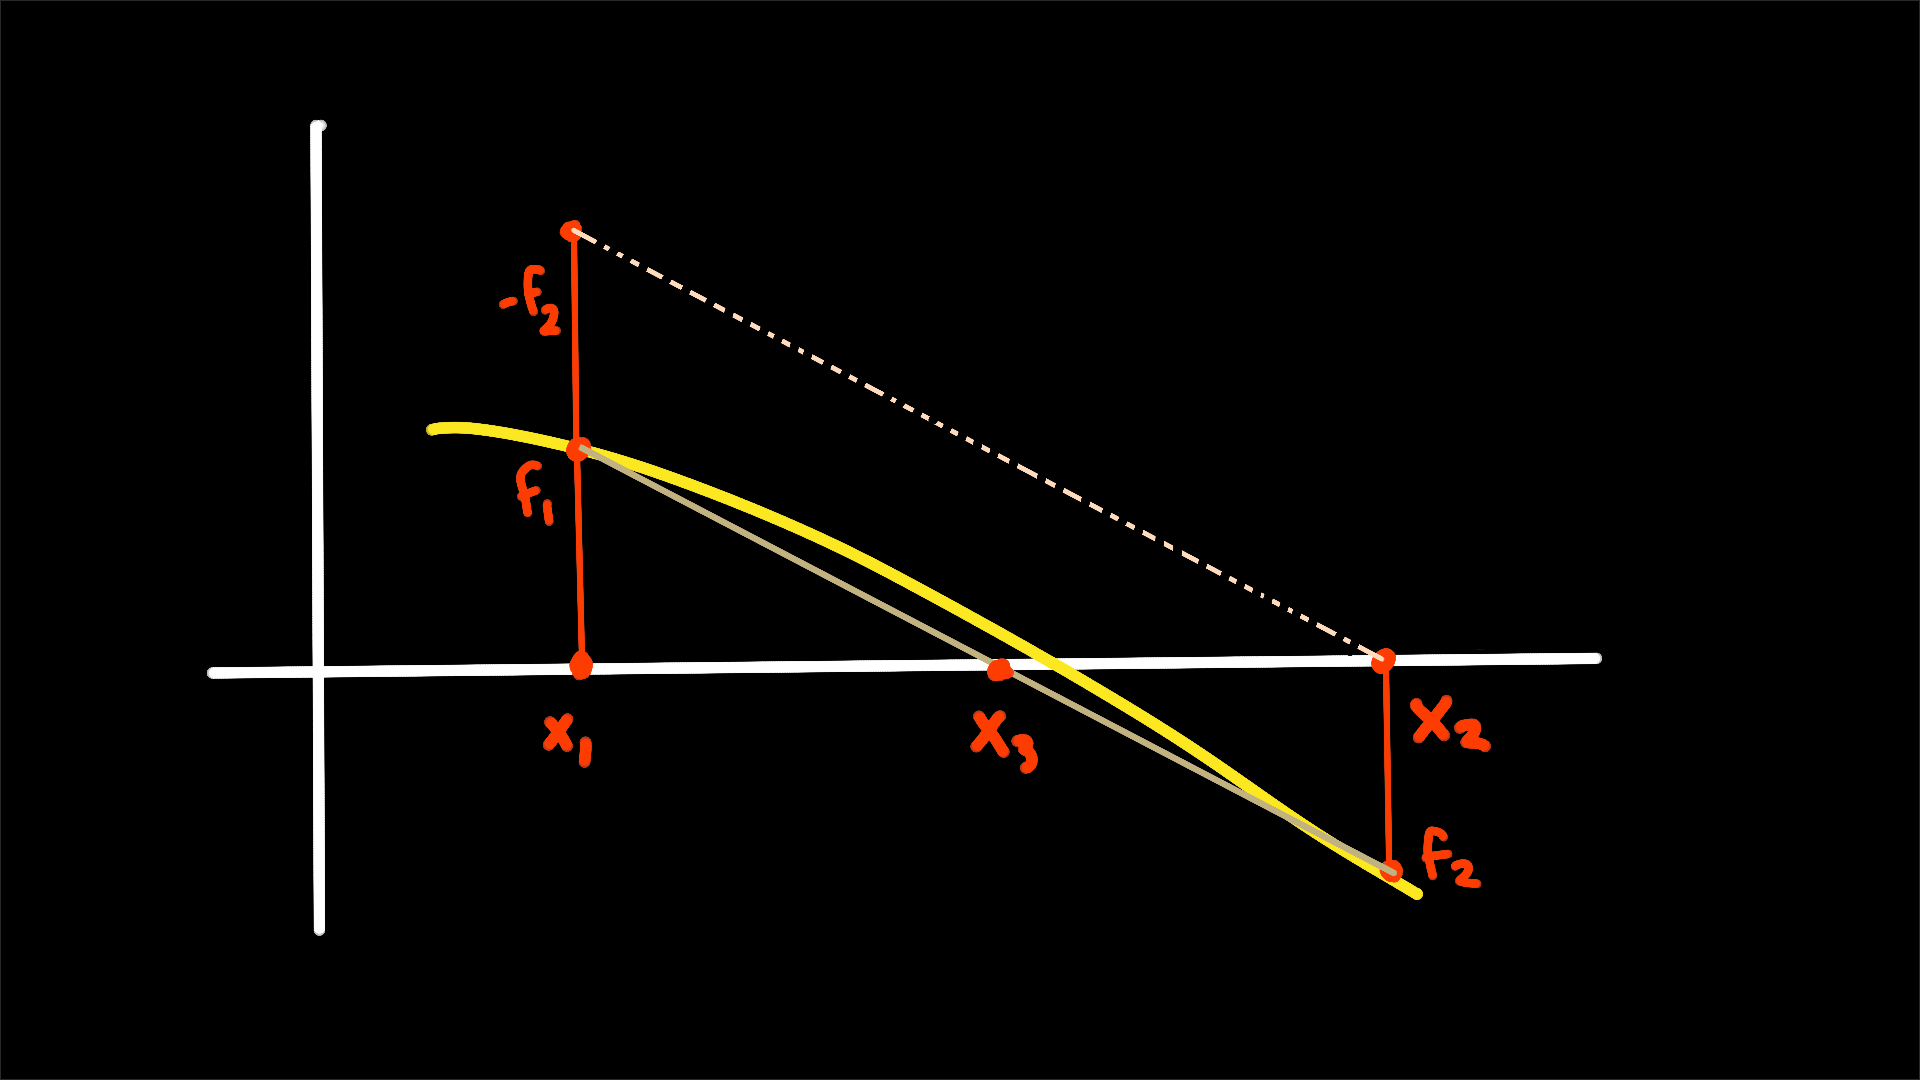

In [9]:
from IPython.display import Image
Image('regulaFalsi.png', width=1500, height=1150)

Por similaridad de triángulos, se tiene 
$$\frac{f_{ 2}}{x_{ 3}- x_{ 2}}=\frac{f_{ 1} - f_{ 2}}{x_{2}- x_{ 1}}$$

donde se usa la notación $f _{ i} = f(x _{ i} )$. Luego la estimación "mejorada" de la raíz es 
$$x _{ 3} = x _{ 2} - f _{ 2} \frac{x _{ 2} - x _{ 1} }{f _{ 2} - f _{1} }$$ 

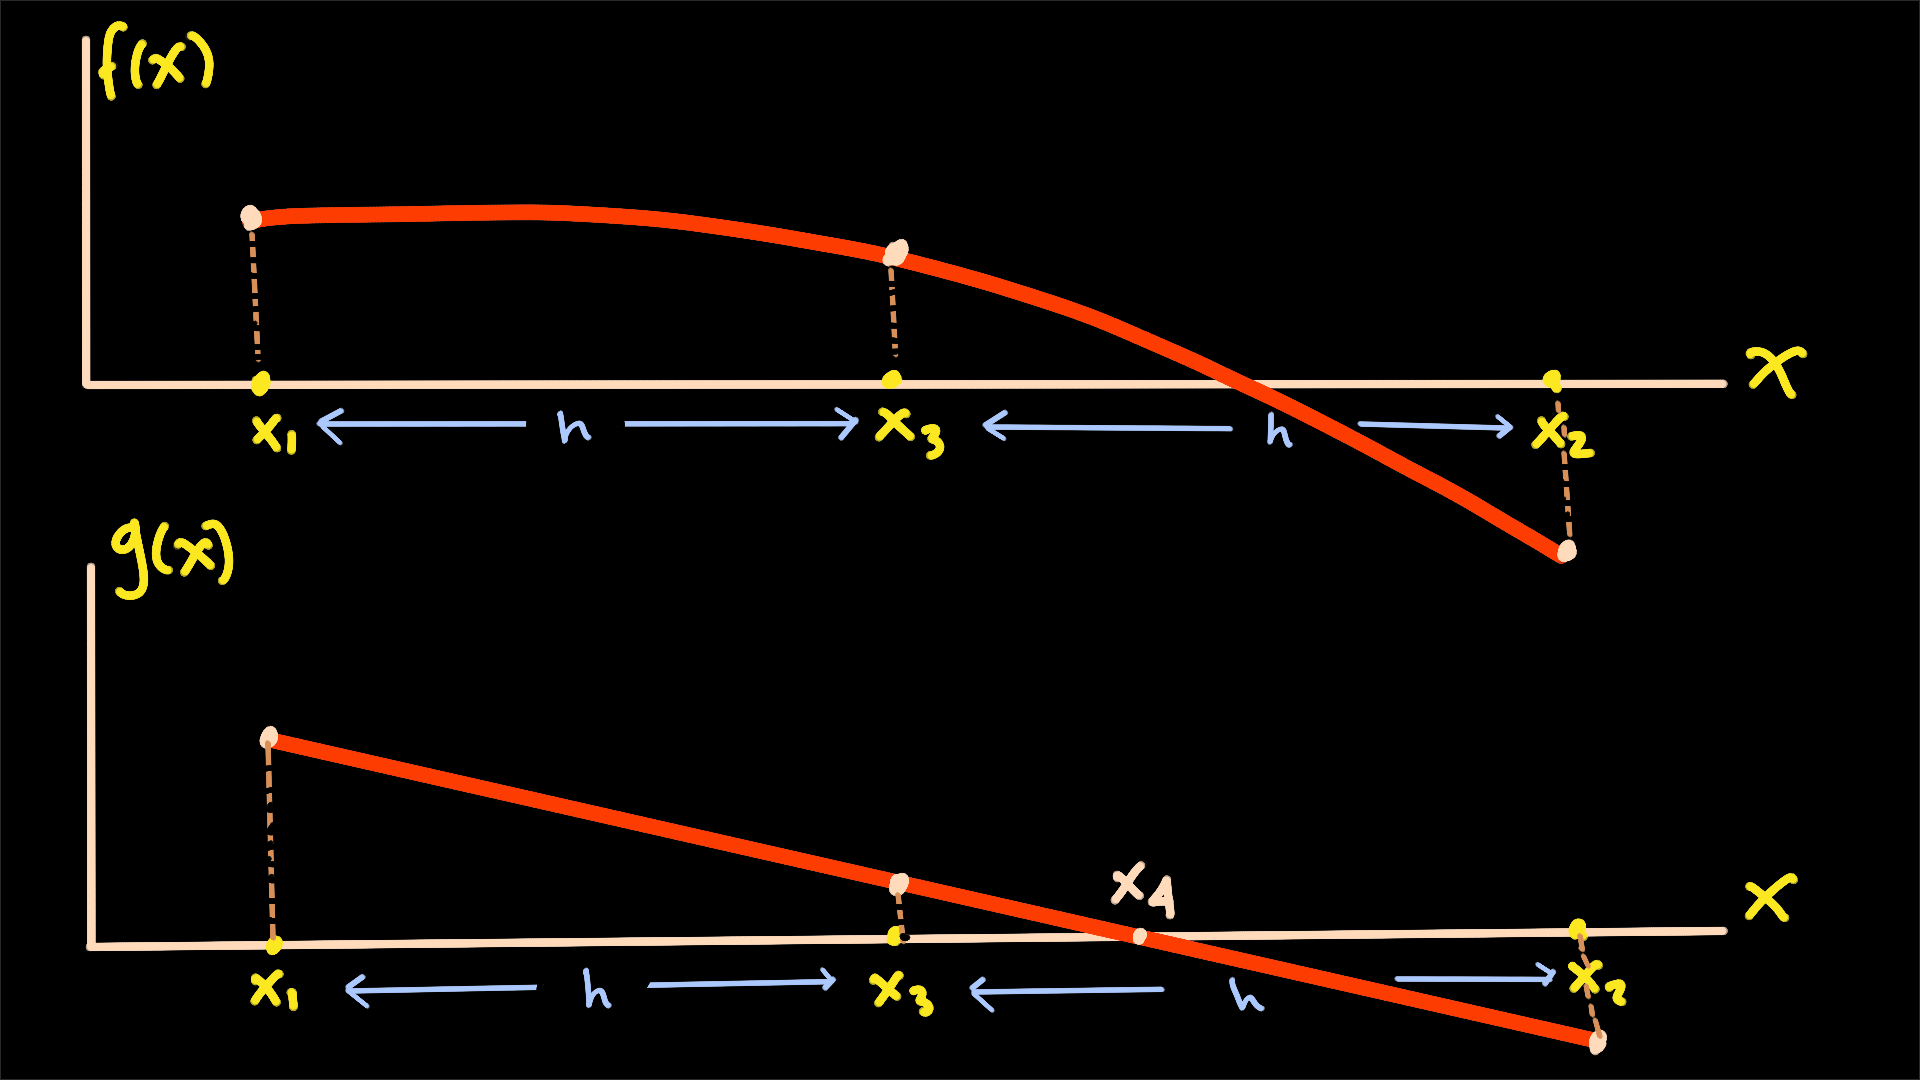

In [10]:
from IPython.display import Image
Image('ridder.png', width=1500, height=1150)

## Método de Ridder

Asuma que la raíz está localizada en $[x _{ 1}, x _{ 2}]$. Primero calcule $f _{ 3} =f(x _{ 3} )$, con $x _{ 3} $ punto medio de $x _{ 1}$ y $x _{ 2}$. 

Se introduce la función $$g(x)= f(x) e ^{ (x - x_{ 1})Q} $$
donde $Q$ es una constante determinada por el requerimiento de que $(x _{ 1} , g _{ 1} )$, $(x _{ 2} , g _{ 2} )$ y $(x _{ 3} , g _{ 3} )$ estén alineados.

Sean $$g _{ 1} = f _{ 1} \quad \quad g _{ 2} = f _{ 2} e ^{ 2hQ}\quad \quad g _{ 3} = f _{ 3} e ^{ hQ}  $$

<font color=grey> donde $h= (x _{ 2} - x _{ 1} )/2$. Para tener los tres puntos alineados, se requiere que $g _{ 3} = (g _{ 1} + g _{ 2} )/2$, es decir, 
$$f _{ 3} e ^{ hQ} = \frac{1}{2} (f _{ 1} + f _{ 2} e ^{ 2hQ} ) $$  </font> 

<font color=grey> la cual es una ecuación cuadrática en $e ^{ hQ} $. La solución es 
$$e ^{ hQ} =\displaystyle \frac{f _{ 3} \pm \sqrt{f _{ 3} ^{ 2} - f _{ 1} f _{ 2} }}{f _{ 2} } $$   </font> 

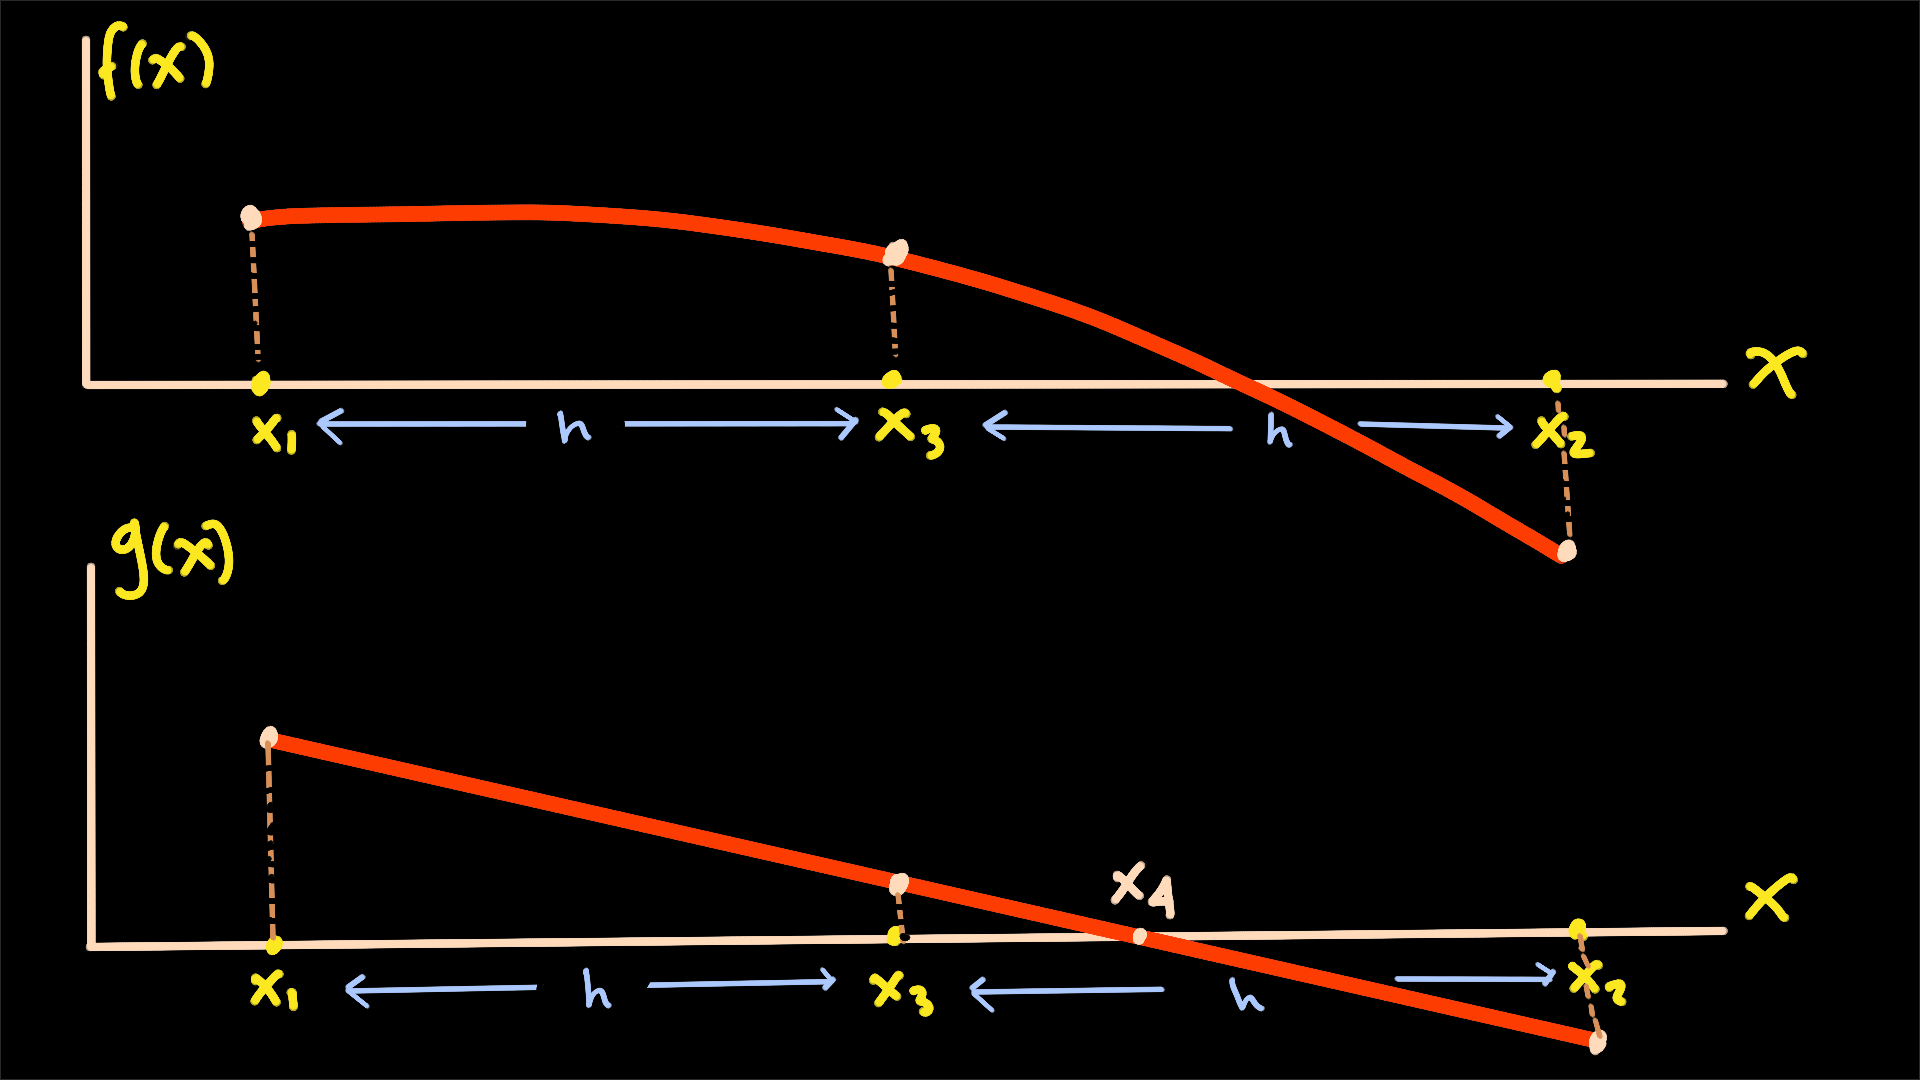

In [11]:
from IPython.display import Image
Image('ridder.png', width=1000, height=750)

Un ajuste lineal basado en los puntos $(x _{ 1} , g _{ 1} )$ y $(x _{ 3} , g _{ 3} )$, lleva a una mejor aproximación 
$$x _{ 4} = x _{ 3} - g _{ 3} \frac{x _{ 3} - x _{ 1} }{g _{ 3} - g _{ 1} } = x _{ 3} - f _{ 3} e ^{ hQ} \frac{x _{ 3} - x _{ 1} }{f _{ 3} e ^{hQ }-f _{ 1}  }  $$

Se obtendrá que $$x _{ 4} = x _{ 3} \pm (x _{ 3} - x _{ 1} ) \frac{f _{ 3} }{\sqrt{f  _{ 3} ^{ 2} - f _{ 1} f _{ 2} }} $$

<font color=grey> Se puede mostrar que el resultado correcto se obtiene si se toma el signo $+$ si $f _{ 1} - f _{ 2} > 0$ y  el signo $-$ si $f _{ 1} - f _{ 2} < 0$. Luego de calcular 
$x _{ 4} $ se determina un nuevo intervalo que localice la raíz para apllicar nuevamente el método. </font> 

In [12]:
def ridder(f, a, b, tol=1.0e-9):
    f1 = f(a)
    if f1 == 0.0: return a
    f2 = f(b)
    if f2 == 0.0: return b
    c = 0.5*(a + b); f3 = f(c)
    
    if np.sign(f2) != np.sign(f3): x1 = c; f1 = f3

    for i in range(10):
        # calcula raíz
        c = 0.5*(a + b); f3 = f(c)
        s = np.sqrt(f3**2 - f1*f2)
        if s == 0.0: return None
        dx = (c - a) * f3 / s
        if (f1 - f2) < 0.0: dx = -dx
        x = c + dx; fx = f(x)

        # relocaliza raíz
        if np.sign(f3) == np.sign(fx):
            if np.sign(f1) != np.sign(fx): b = x; f2 = fx
            else: a = x; f1 = fx
        else: 
            a = c; b = x; f1 = f3; f2 = fx
    return x

$$x _{ 4} = x _{ 3} \pm (x _{ 3} - x _{ 1} ) \frac{f _{ 3} }{\sqrt{f  _{ 3} ^{ 2} - f _{ 1} f _{ 2} }} $$

<font color=grey> signo $+$ si $f _{ 1} - f _{ 2} > 0$
    
signo $-$ si $f _{ 1} - f _{ 2} < 0$.
    
Luego de calcular $x _{ 4} $ se determina un nuevo intervalo que localice la raíz para apllicar nuevamente el método. </font> 

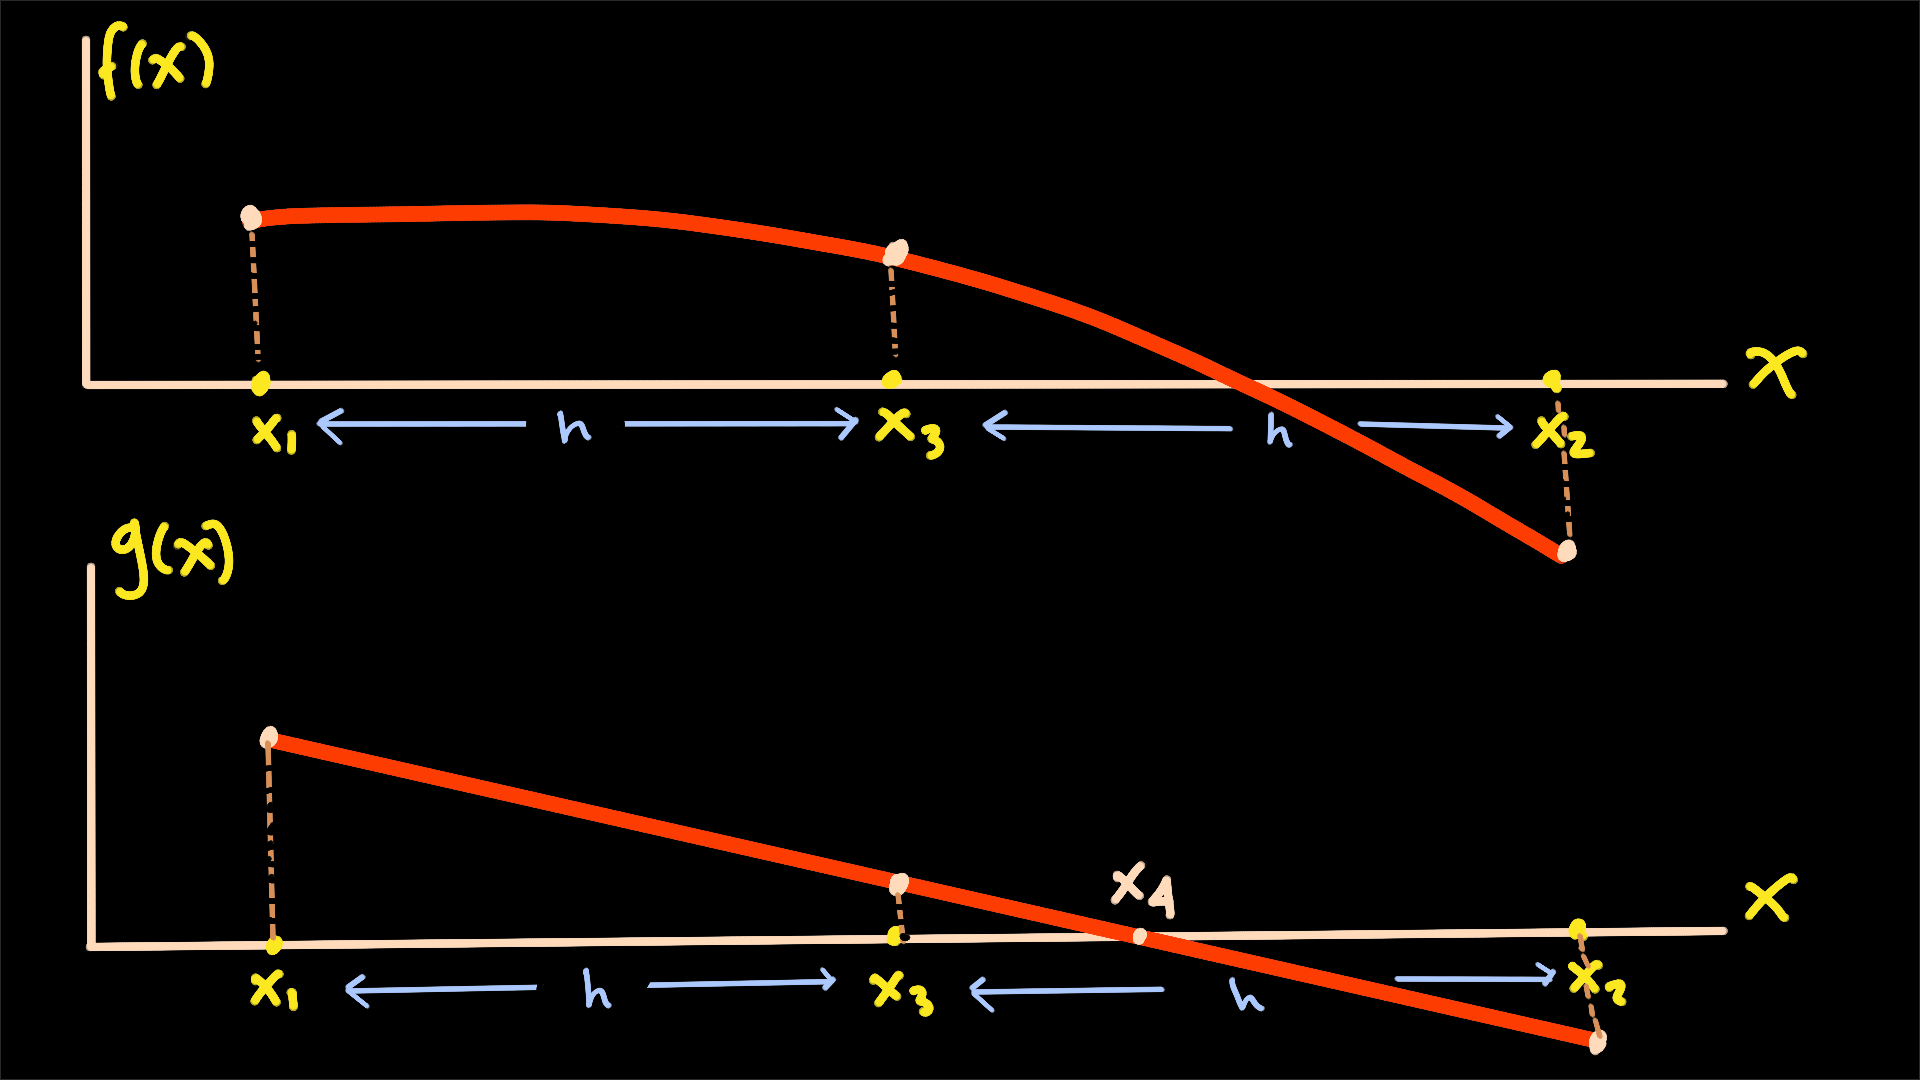

In [13]:
from IPython.display import Image
Image('ridder.png', width=1500, height=1150)

Calcular el cero de la función $$f(x) = \frac{1}{(x - 0.3) ^{ 2} + 0.01} - \frac{1}{(x - 0.8) ^{ 2} + 0.04}$$

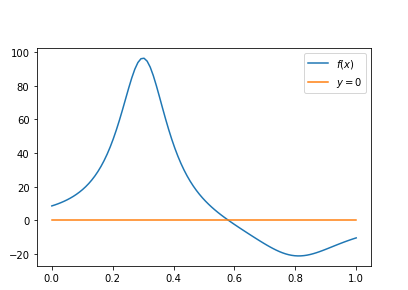

In [14]:
xs3 = np.linspace(0, 1, 100)
a = (xs3 - 0.3)**2 + 0.01
b = (xs3 - 0.8)**2 + 0.04
ys3 = 1.0 / a - 1.0 / b
plt.plot(xs3, ys3)
plt.plot([0, 1], [0, 0])
plt.title(r'$f(x) = \frac{1}{(x - 0.3) ^{ 2} + 0.01} - \frac{1}{(x - 0.8) ^{ 2} + 0.04}$', color='white', fontsize=25)
plt.legend([r'$f(x)$', r'$y=0$'])
plt.show()

In [15]:
def f(x):
    a = (x - 0.3)**2 + 0.01
    b = (x - 0.8)**2 + 0.04
    return 1.0 / a - 1.0 / b

print('raíz = ', ridder(f, 0.0, 1.0))

raíz =  0.5800000000000001


## Newton-Raphson
El algoritmo de Newton-Raphson es el mejor para encontrar raíces
por una buena razón: es simple y rápido. El único inconveniente 
es que usa la derivada $f'(x)$ además de $f(x)$. 

<font color=grey> La fórmula de Newton-Raphson puede deducirse de la expasión en 
serie de Taylor de $f(x)$:

$$f(x _{ i+1} ) = f(x _{ i} )+f'(x _{ i} )(x _{ i+1} - x _{ i} ) + O(x _{ i+1}-x _{ i}  ) ^{ 2} $$
    
donde $O(z)$ debe ser leido como "del orden de $z$". </font> 



.

<font color=grey> Si $x _{ i+1} $ es una raíz de $f(x)=0$, tenemos:

$$0= f(x _{ i} )+f'(x _{ i} )(x _{ i+1} - x _{ i} ) + O(x _{ i+1}-x _{ i}  ) ^{ 2} $$    </font> 

Asumiendo que $x _{ i} $ es cercano a $x _{ i+1} $, se puede despreciar el último término y resolver la ecuación para $x _{ i+1} $ y el resultado es la conocida
fórmula de Newton-Raphson:

<font color=green> $$x _{ i+1} = x _{ i} - \frac{f(x _{ i} )}{f'(x _{ i} )} $$   </font> 

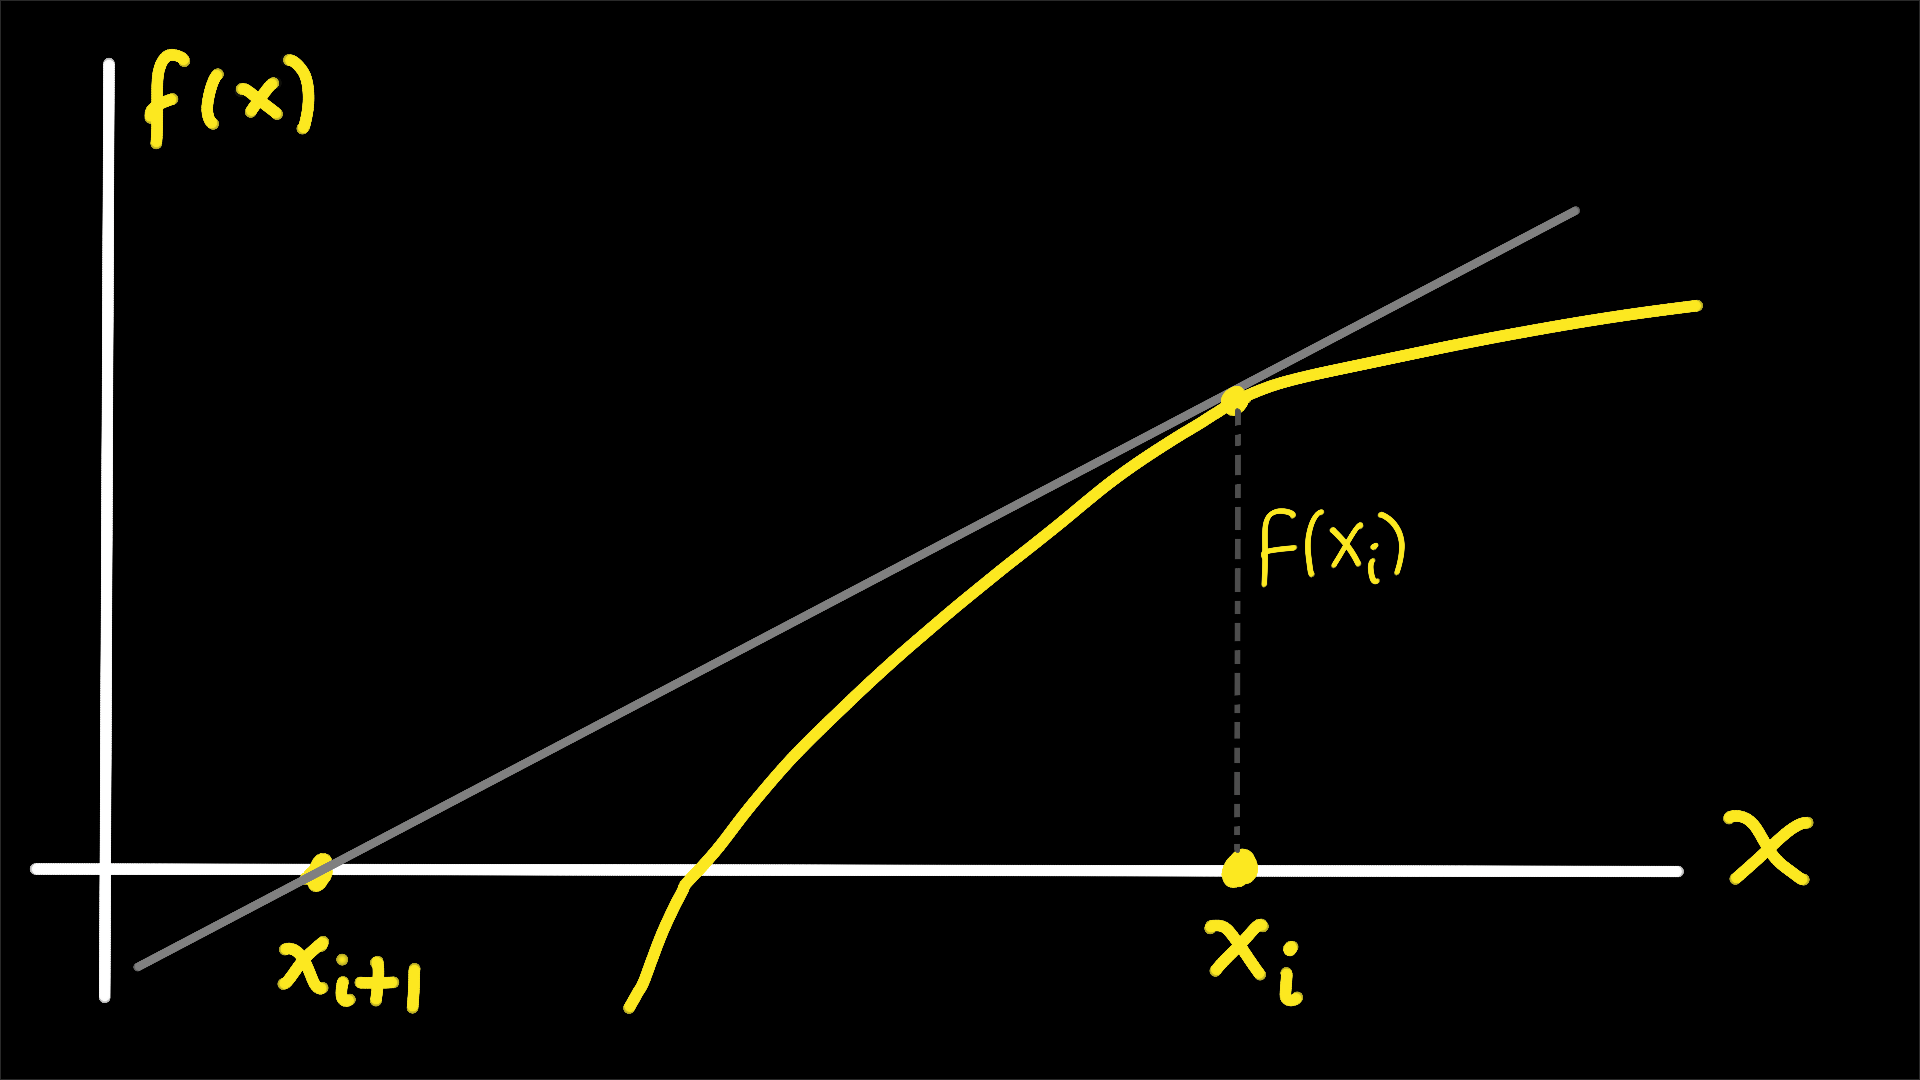

In [16]:
from IPython.display import Image
Image('newtonRaphson.png', width=1200, height=800)

Se busca aproximar $f(x)$ por una línea recta que es tangente a la curva en el punto $(x _{ i} , f(x _{ i} ))$.

$x _{ i+1} $ es la intersección del eje $x$ con la línea tangente.

El método de Newton-Raphson se aplica repetidamente comenzando con un valor inicial $x _{ 0} $,  hasta el cumplimiento de un "criterio de convergencia"

$$|x _{ i+1} - x _{ i}  |< \varepsilon$$   

$\varepsilon$ es considerado un error a tolerar.

El método de Newton-Raphson tiene problemas cuando la línea tangente no es una aproximación aceptable de $f(x)$ .

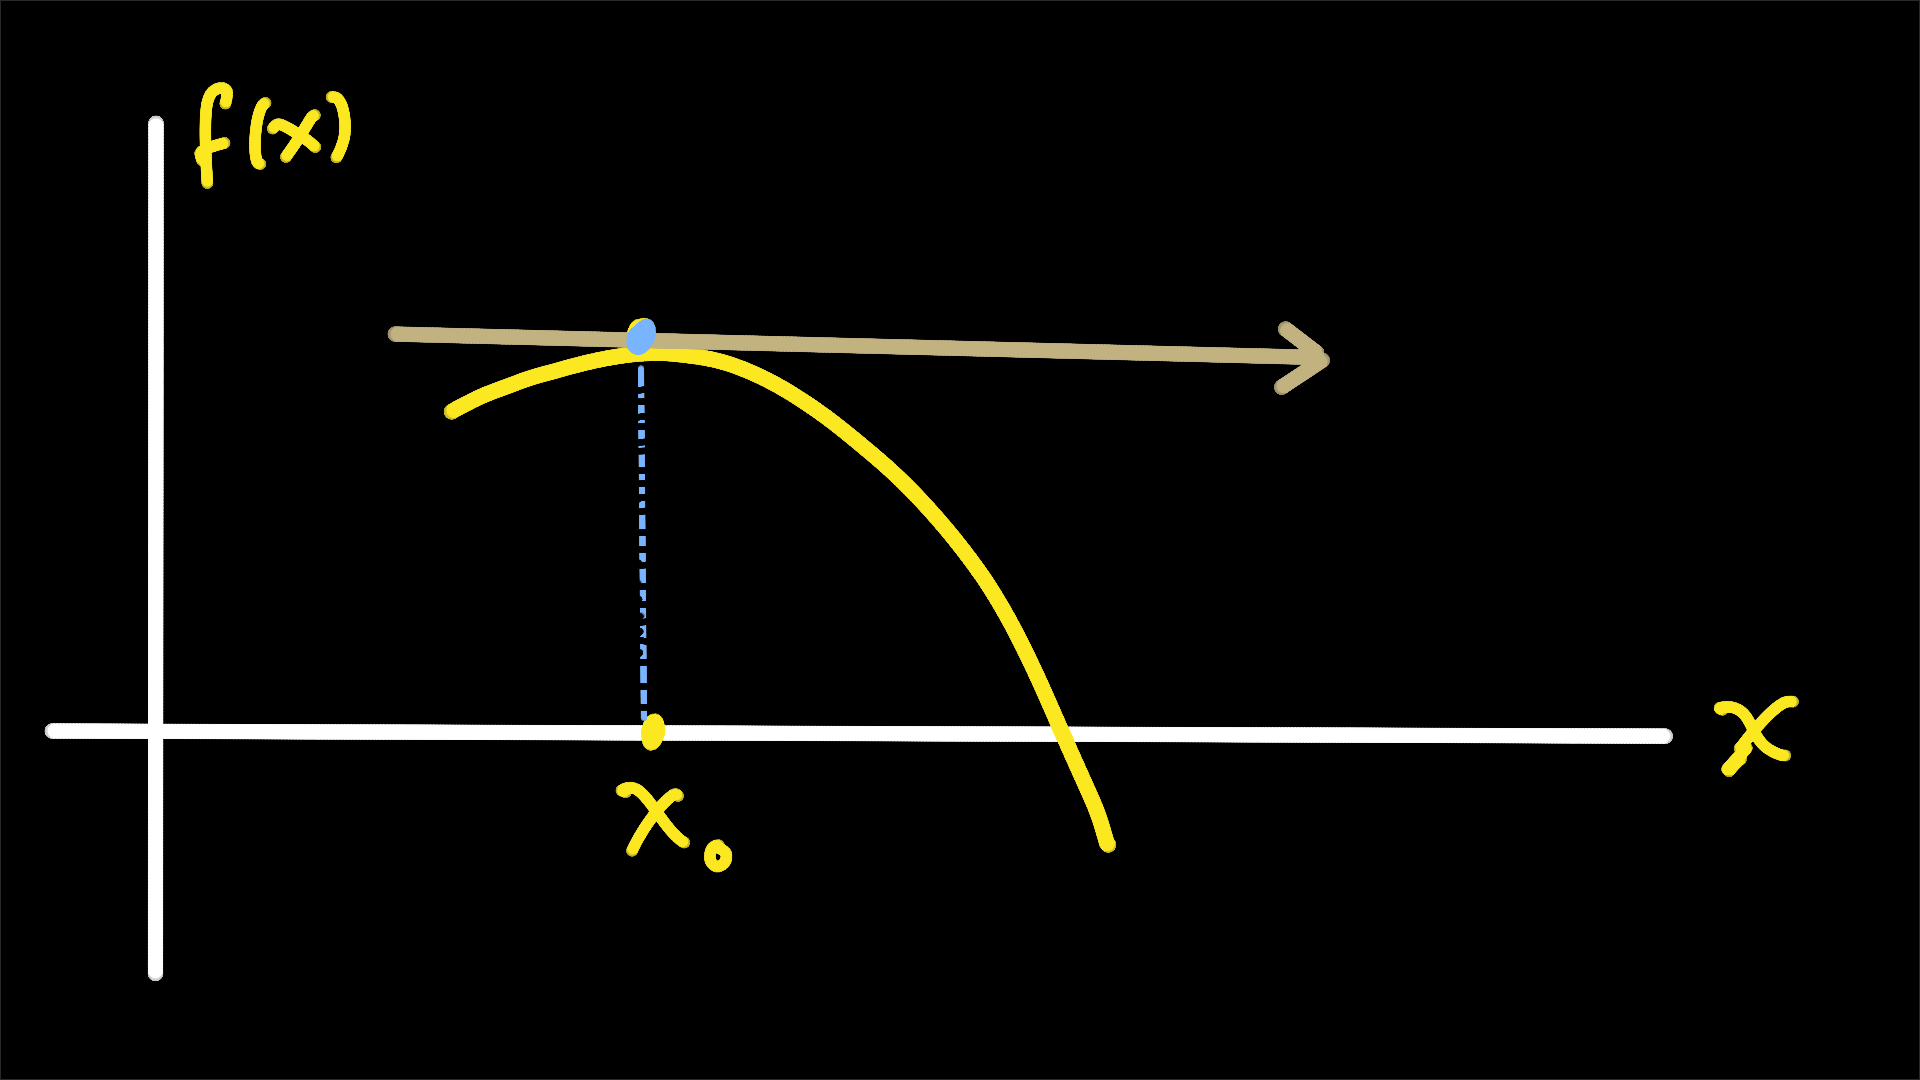

In [17]:
from IPython.display import Image
Image('raphson1.png', width=1200, height=800)

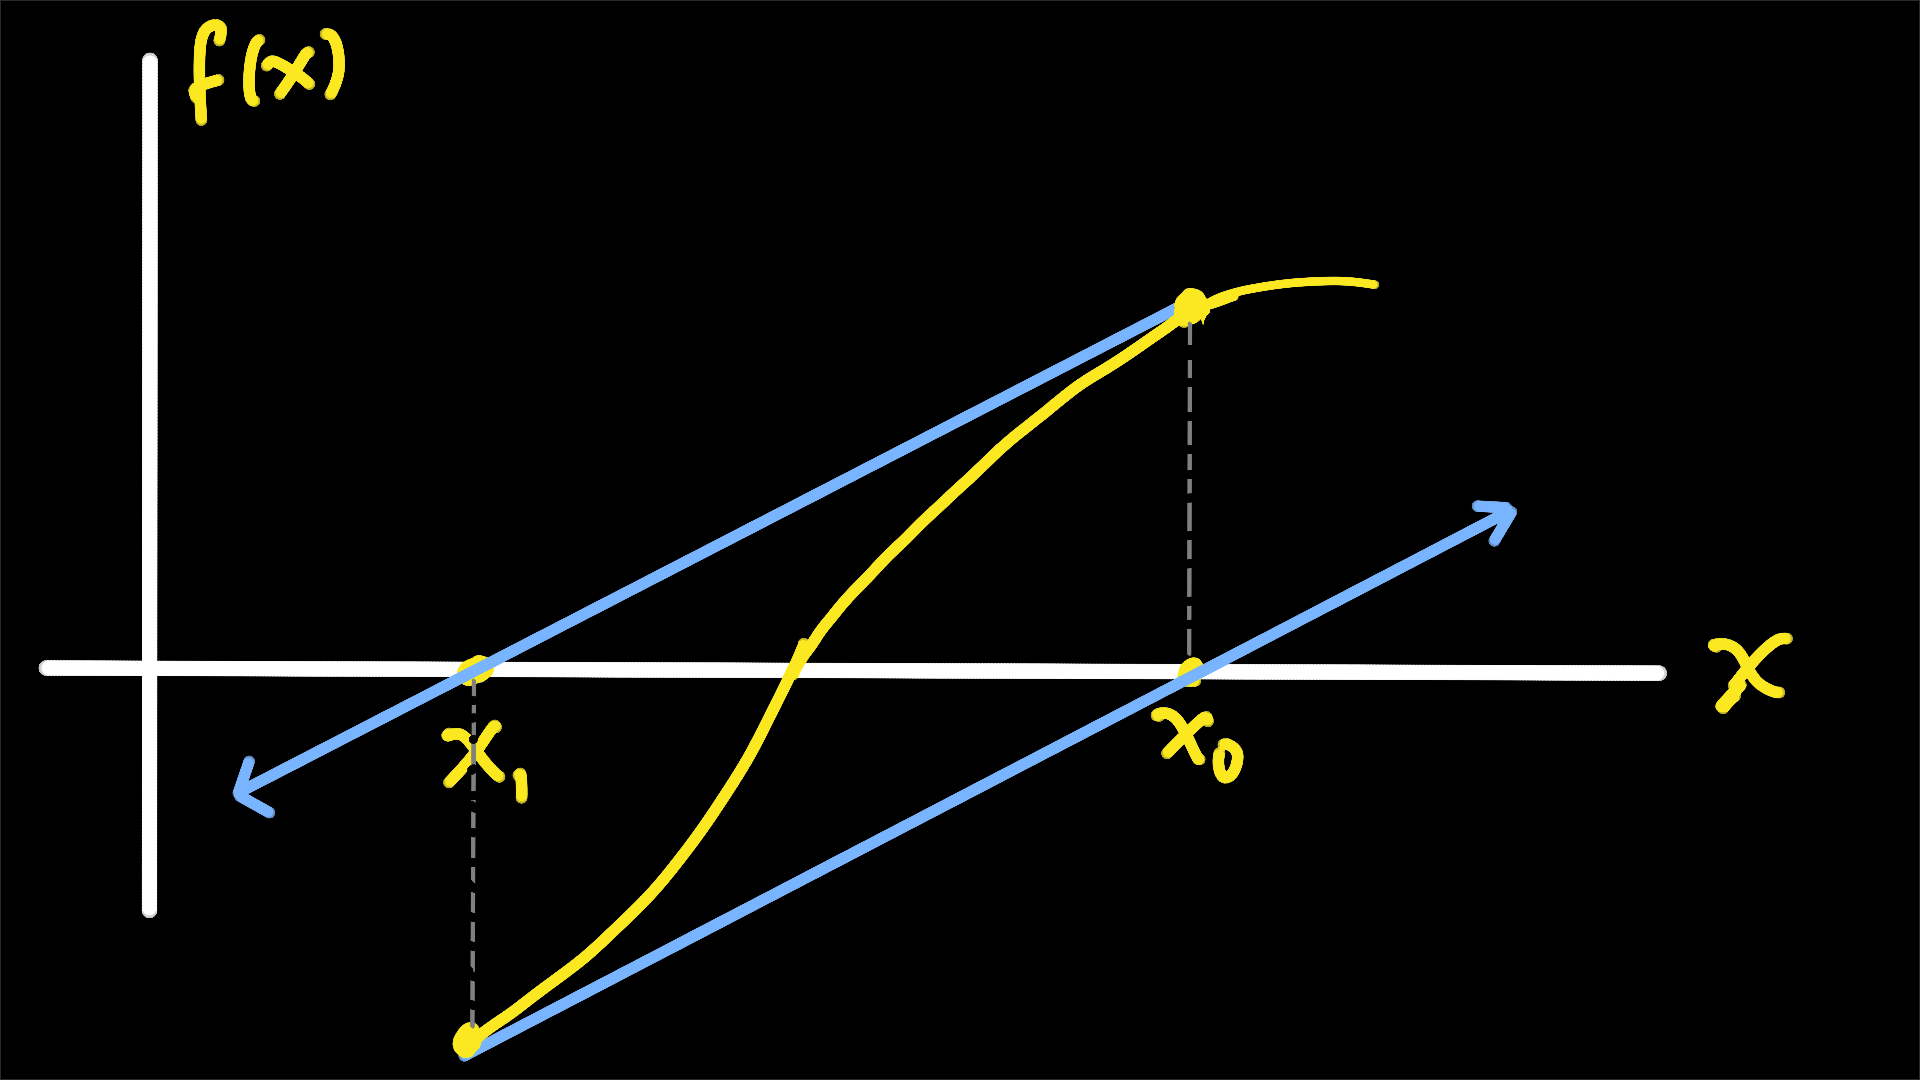

In [18]:
from IPython.display import Image
Image('raphson2.png', width=1200, height=800)

In [19]:
def newtonRaphson(f, df, a, b, tol=1.0e-9):
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if np.sign(fa) == np.sign(fb):
        print("Raíz no localizada")
    x = 0.5 * (a + b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        # ajusta localizadores de la raíz
        if np.sign(fa) != np.sign(fx): b = x
        else: a = x
        # Intenta un paso de Newton-Raphson
        dfx = df(x)
        # Si hay división por cero, 
        # empuje x fuera de las cotas
        try: dx = -fx / dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
        # Si el resultado esta afuera del intervalo
        # de localización use bisección
        if (b - x) * (x - a) < 0.0:
            dx = 0.5 * (b - a)
            x = a + dx
        # verifica convergencia
        if abs(dx) < tol: return x

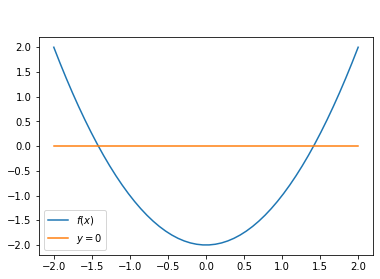

In [20]:
xs6 = np.linspace(-2, 2)
ys6 = xs6  ** 2 - 2
plt.plot(xs6, ys6)
plt.plot([-2, 2], [0, 0])
plt.title(f'$f(x)=x^2-2$', color='white', fontsize=25)
plt.legend([r'$f(x)$', r'$y=0$'])
plt.show()

In [21]:
########## Ejemplo 6 ##########
def f(x): return x **2 - 2

def df(x): return 2 * x

x = newtonRaphson(f, df, 1, 2)
x

1.4142135623730951